In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargamos los datos con un encoding diferente al utf-8

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datos/data.csv', encoding="ISO-8859-1")

# Análisis exploratorio y preprocesamiento

In [3]:
print('Tenemos una estructura de: ', df.shape)
df.head(5)

Tenemos una estructura de:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Tipo de datos que tenemos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Estadísticas descriptivas de las columnas numéricas

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Verificamos la presencia de valores faltantes en el conjunto de datos y los mostramos en orden descendente.

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Número de valores únicos en la columna 'Description'

In [7]:
description_counts = df['Description'].value_counts()
description_counts

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

Convertimos la columna 'InvoiceDate' a formato de fecha y hora utilizando el formato correcto

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors="coerce")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Rellenamos con ceros o 'Unknown' porque eliminar las filas o columnas con valores faltantes puede resultar en pérdida de información valiosa y reducción del tamaño del conjunto de datos.

In [9]:
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID']  = df['CustomerID'].fillna(0)

Comprobamos el número de missings, ahora debería ser cero.

In [10]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Vemos el número de duplicados.

In [11]:
df.duplicated().sum()

5268

Eliminamos los duplicados pues no ofrecen información adicional.

In [12]:
df.drop_duplicates(inplace = True)

Vemos si hay filas que tienen un precio negativo ya que esto no tiene sentido.

In [14]:
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom


Nos quedamos con un dataset que solo tenga valores de precio positivos.

In [15]:
df  = df[df['UnitPrice'] > 0]

Comprobamos a ver si lo hemos solucionado.

In [16]:
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Comprobamos si hay alguno gratis, es decir, con precio cero.

In [17]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


'C' es un aspecto crucial de la información: sugerir transacciones canceladas con devoluciones muestra negativos para la Cantidad

In [18]:
len(df[df['InvoiceNo'].str.startswith('C')])

9251

Aplicamos una columna tranformadora.

In [19]:
df['status'] = df['InvoiceNo'].apply(lambda x: 0 if str(x).startswith('C') else 1)
df['status'].value_counts()

1    524878
0      9251
Name: status, dtype: int64

Corregimos el formato para la columna 'InvoiceNo'.

In [20]:
df['InvoiceNo'] = df.apply(lambda x: int(str(x['InvoiceNo'])[1:]) if (x['status'] == 0) else x['InvoiceNo'], axis=1)
df['InvoiceNo'].dtype

dtype('O')

Vemos como se ha modificado el df.

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1


Recuento de valores únicos de la columna 'StockCode'.

In [22]:
df['StockCode'].value_counts()

85123A    2295
22423     2187
85099B    2153
47566     1719
20725     1626
          ... 
90126C       1
22218        1
85031C       1
84743C       1
84387A       1
Name: StockCode, Length: 3938, dtype: int64

Verificamos cuántas entradas en la columna 'StockCode' no son compuestas completamente por dígitos (es decir, contienen al menos un carácter que no es un dígito).

In [23]:
(df['StockCode'].str.isdigit() == False).value_counts()

False    480270
True      53859
Name: StockCode, dtype: int64

Vemos estas columnas que no son completamente dígitos.

In [24]:
df[(df['StockCode'].str.isdigit() == False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,1
...,...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany,1
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,1
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom,1
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,1


Mostramos cuántos caracteres numéricos contiene cada valor único en la columna 'StockCode'. Luego, mostramos la frecuencia de la cantidad de caracteres numéricos en esos códigos.

In [25]:
unique_stockcode = df['StockCode'].value_counts().index

digit_counts = [sum(char.isdigit() for char in str(value)) for value in unique_stockcode]
count_series = pd.Series(digit_counts)
count_series.value_counts()

5    3914
0      13
6       5
4       5
1       1
dtype: int64

Dropeamos los valores que tienen 0 o 1 caracteres numéricos.

In [26]:
keys_to_drop = [key for key in unique_stockcode if sum(char.isdigit() for char in str(key)) in [0, 1]]
keys_to_drop

['POST',
 'DOT',
 'M',
 'C2',
 'D',
 'S',
 'BANK CHARGES',
 'AMAZONFEE',
 'CRUK',
 'DCGSSGIRL',
 'DCGSSBOY',
 'PADS',
 'm',
 'B']

Restablecemos los índices del df y luego contamos la cantidad de filas en las que el valor de la columna 'StockCode' está en la lista keys_to_drop.

In [27]:
import numpy as np
df.reset_index(drop=True, inplace=True)
len(np.where(df['StockCode'].isin(keys_to_drop))[0])

2917

Eliminamos las filas del df que tienen 'StockCode' en la lista keys_to_drop.

In [28]:
stock_codes_idx = np.where(df['StockCode'].isin(keys_to_drop))[0]

df = df.drop(labels=stock_codes_idx, axis=0)

(531212, 9)

Comprobamos que de todos los tipos de productos hay al menos una cantidad.

In [29]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,status


Visualizamos la proporción de transacciones procesadas y canceladas.

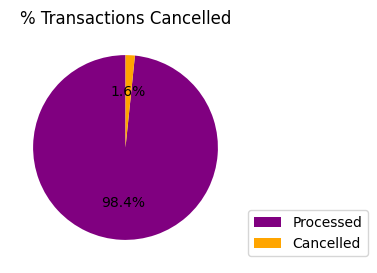

In [30]:
import matplotlib.pyplot as plt

counts_cancel_or_not = (df['Quantity'] >= 0).value_counts()

plt.figure(figsize=(5,3))
wedges, text, autotexts = plt.pie(counts_cancel_or_not, startangle=90, autopct='%1.1f%%', colors=['purple', 'orange'])
labels = ['Processed', 'Cancelled']
plt.legend(wedges, labels, loc='lower left', bbox_to_anchor=(1,0,0,1))
plt.title(f'% Transactions Cancelled')

plt.show()

Agrupamos los datos por mes y calculamos las ventas totales para cada mes.

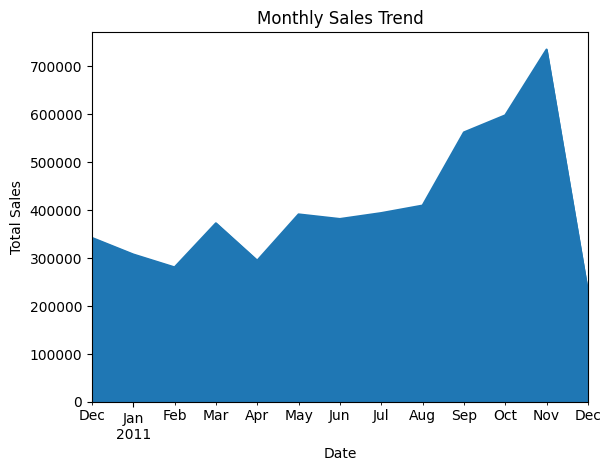

In [31]:
# Agrupamos por mes y calculamos las ventas totales (suma de 'Cantidad') para cada mes
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# Trazamos la tendencia de ventas mensual utilizando un gráfico de área
monthly_sales.plot(kind='area', stacked=True)

plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

Generamos heatmap que muestra la matriz de correlación entre las variables numéricas.

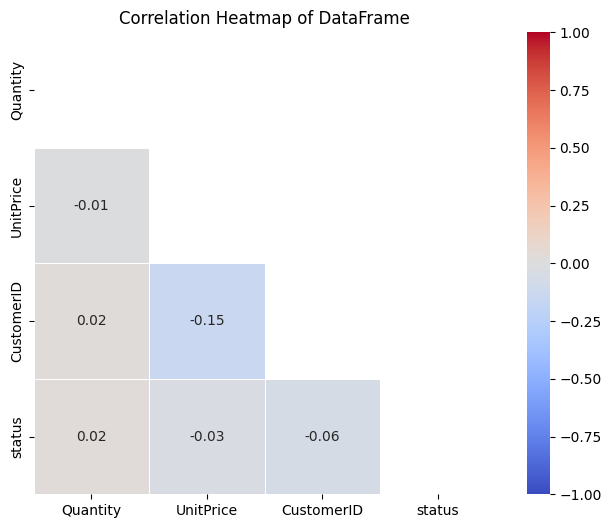

In [32]:
import seaborn as sns

plt.figure(figsize=(8, 6))

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of DataFrame')
plt.show()

# Feature Engineering

Eliminamos las columnas que son innecesarias.

In [34]:
df=df.drop(['Description','CustomerID','StockCode', 'InvoiceNo', 'status'], axis=1)

Vemos cómo queda el df.

In [35]:
df.head(5)

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom


In [36]:
# Convertimos la columna 'InvoiceDate' a formato de fecha y hora
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors="coerce")

# Extraemos solo la parte de la fecha (ignorando las horas y minutos)
df['InvoiceDate'] = df['InvoiceDate'].dt.date

# Agrupamos por fecha y país, sumamos la cantidad y calculamos el precio promedio
df=df.groupby(['InvoiceDate']+['Country']).agg({'Quantity':'sum', 'UnitPrice': 'mean'}).reset_index()

df

,InvoiceDate,Country,Quantity,UnitPrice
0,2010-12-01,Australia,107,5.278571
1,2010-12-01,EIRE,242,4.182000
2,2010-12-01,France,446,1.962632
3,2010-12-01,Germany,116,2.707857
4,2010-12-01,Netherlands,96,1.850000
...,...,...,...,...
1682,2011-12-09,Belgium,202,1.076250
1683,2011-12-09,France,105,2.966667
1684,2011-12-09,Germany,872,2.654615
1685,2011-12-09,Norway,2227,2.378788


Consideramos hacer One-Hot Encoding para la columna 'Country'.

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
countries_encoded = encoder.fit_transform(df['Country'].values.reshape(-1, 1))

df = pd.concat([df.drop('Country', axis=1), pd.DataFrame(countries_encoded, columns=[f'Country_{i}' for i in range(countries_encoded.shape[1])])], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Vemos cómo queda el df.

In [38]:
df.head()

,InvoiceDate,Quantity,UnitPrice,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,...,Country_28,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37
0,2010-12-01,107,5.278571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-12-01,242,4.182000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-12-01,446,1.962632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-12-01,116,2.707857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-12-01,96,1.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creamos etiquetas y secuencias para el entrenamiento y validación.

In [39]:
# Creamos secuencias diarias sin incluir la fecha en las características
sequences = []
labels = []
max_sequence_length = 0  # Para almacenar la longitud máxima de la secuencia

for date in df['InvoiceDate'].unique():
    daily_data = df[df['InvoiceDate'] == date]
    sequence = daily_data[['Quantity', 'UnitPrice'] + [f'Country_{i}' for i in range(countries_encoded.shape[1])]].values
    label = daily_data['Quantity'].sum()
    sequences.append(sequence)
    labels.append(label)

    # Actualizamos la longitud máxima de la secuencia
    max_sequence_length = max(max_sequence_length, sequence.shape[0])

# Rellenamos las secuencias más cortas con ceros para tener la misma longitud
sequences_padded = []
for sequence in sequences:
    pad_length = max_sequence_length - sequence.shape[0]
    padded_sequence = np.pad(sequence, ((0, pad_length), (0, 0)), 'constant', constant_values=0)
    sequences_padded.append(padded_sequence)

sequences = np.array(sequences_padded)
labels = np.array(labels)

Vemos qué forma tiene.

In [40]:
sequences.shape

(305, 13, 40)

- 305: Número de secuencias.
- 13: Longitud de cada secuencia.
- 40: Número de características

# Diseño y entrenamiento del modelo
Dividimos en conjuntos de entrenamiento y test.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

Estandarización y normalización.

In [43]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Extraemos todas las características ('Quantity', 'UnitPrice', y las codificadas del país) de cada secuencia en el conjunto de entrenamiento
X_train = X_train[:, :, :]

# Extraemos todas las características ('Quantity', 'UnitPrice', y las codificadas del país) de cada secuencia en el conjunto de prueba
X_test = X_test[:, :, :]

# Normalizamos todas las características en el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

# Aplicamos la misma normalización a todas las características en el conjunto de prueba
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Asignamos los datos normalizados de vuelta a X_train y X_test
X_train[:, :, :] = X_train
X_test[:, :, :] = X_test

Vemos las estructuras.

In [44]:
X_train.shape

(244, 13, 40)

In [45]:
y_train.shape

(244,)

Red convolucional 1D.

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

#Creamos el modelo
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(1))

Estructura del modelo.

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            7744      
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [48]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [49]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
16/16 [==============================] - 5s 46ms/step - loss: 378987456.0000 - mse: 378987456.0000 - val_loss: 367466752.0000 - val_mse: 367466752.0000
Epoch 2/50
16/16 [==============================] - 0s 10ms/step - loss: 376740576.0000 - mse: 376740576.0000 - val_loss: 359758048.0000 - val_mse: 359758048.0000
Epoch 3/50
16/16 [==============================] - 0s 11ms/step - loss: 349785056.0000 - mse: 349785056.0000 - val_loss: 290693280.0000 - val_mse: 290693280.0000
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 191059376.0000 - mse: 191059376.0000 - val_loss: 70234296.0000 - val_mse: 70234296.0000
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 74102544.0000 - mse: 74102544.0000 - val_loss: 60553200.0000 - val_mse: 60553200.0000
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 56401320.0000 - mse: 56401320.0000 - val_loss: 57320268.0000 - val_mse: 57320268.0000
Epoch 7/50
16/16 [=================

# Evaluación del modelo y ajuste de hiperparámetros

In [50]:
from sklearn.metrics import r2_score

# Evaluamos el modelo
eval_train = model.evaluate(X_train, y_train)
eval_test = model.evaluate(X_test, y_test)

# Extraemos el error cuadrático medio y otras métricas si es necesario
mse_tr, *_ = eval_train
mse_ts, *_ = eval_test

# Calculamos R^2
r2_tr = r2_score(y_train, model.predict(X_train).reshape(-1))
r2_ts = r2_score(y_test, model.predict(X_test).reshape(-1))

print('MSE train: %.2f' % mse_tr)
print('R^2 train: %.4f' % r2_tr)

print('MSE test: %.2f' % mse_ts)
print('R^2 test: %.4f' % r2_ts)

2/2 [==============================] - 0s 16ms/step
MSE train: 1526166.75
R^2 train: 0.9799
MSE test: 11935817.00
R^2 test: 0.8413


Vemos los resultados para ver si hay sobreajuste o no.

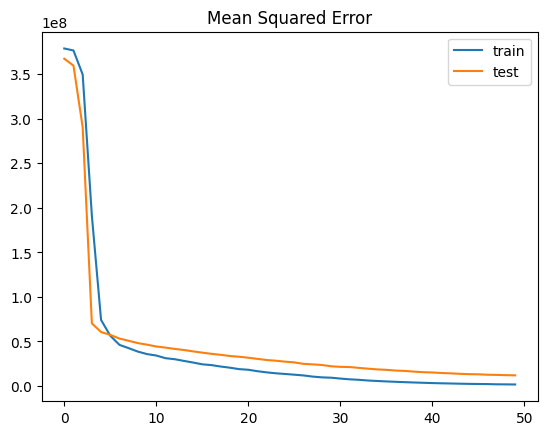

In [51]:
plt.subplot()
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

No tenemos sobreajuste porque se ajustan bien ambas curvas. Por lo tanto, nuestro modelo se ajusta considerablemente bien.

Predecimos.

In [52]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


Nuevo df para comparar las predicciones del modelo con los valores reales.

In [54]:
result = pd.DataFrame(
    {
        'Actual':y_test,
        'Prediction':np.round(preds[:, 0]).astype(int)

    }
)

In [55]:
result.head(10)

,Actual,Prediction
0,11014,11801
1,20211,22689
2,18207,17832
3,23906,27437
4,5207,4506
5,10499,7012
6,17266,17135
7,15676,18077
8,7192,7279
9,17219,19451


Consideramos que hay muy buenas predicciones. No hay un gran desajuste entre los datos reales y los predichos.

In [57]:
from sklearn.metrics import r2_score

r2_score(y_test,preds[:, 0])

0.841344395189495

Un valor de R^2 de 0.8413 es bastante bueno y sugiere que el modelo de regresión explica aproximadamente el 84,13% de la variabilidad en los datos observados.

In [58]:
model.save('/content/drive/MyDrive/Datos/football_sales_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Guardamos el modelo para posteriormente implementarlo de manera que pueda generar pronósticos en tiempo real para las ventas de camisetas de fútbol.